# Place Analysis Here

In [2]:
#Out of all the drug regimens, in the first quantitative analysis, it is shown that 
#Ramicane has the lowest mean tumor volume, while Ketapril has the highest. 

#Ramicane had one of the lowest final 
#tumor volumes as well according to the box plot generated below, which further supports it as a regimen. 
#Additionally, it had one of the highest numbers of numbers of mice included. 
#Capomulin follows these two trends as well, making it an additional drug of interest out of this list. 

#According to this as well as additional supporting details below, Ramicane and Capomulin both appear to be
#candidates for further research and development support.

# Collecting and Processing Data

In [3]:
#%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [4]:
# Combine the data into a single dataset
combined_study_data = pd.merge(mouse_metadata, study_results, how ="outer", on ="Mouse ID")


# Display the data table for preview
combined_study_data.head(15)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
# Checking the number of mice.
number_of_mice = combined_study_data["Mouse ID"].nunique()
print("There are", number_of_mice, "mice.")

There are 249 mice.


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = combined_study_data.loc[combined_study_data.duplicated(["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
print(duplicate_mouse_id)

['g989']


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_study_data[combined_study_data.duplicated()]
print(duplicate_mouse)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
909                45.0                 0  


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_study_data[combined_study_data["Mouse ID"].isin(duplicate_mouse_id) == False]



#Verify duplicate drop by seeing difference in length of column


print(clean_df["Mouse ID"].nunique())

# #Renaming cleaned DataFrame

combined_study_data_cln = clean_df


248


# Summary Statistics

In [45]:
# # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


summary_mean = combined_study_data_cln.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
print(summary_mean)

summary_median = combined_study_data_cln.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
print(summary_median)

summary_variance = combined_study_data_cln.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
print(summary_variance)

summary_stdev = combined_study_data_cln.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
print(summary_stdev)

summary_SEM = combined_study_data_cln.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
print(summary_SEM)


summary_statistics_df = pd.DataFrame ({"Mean Tumor Volume" : summary_mean, "Median Tumor Volume" : summary_median, "Median Tumor Variance" :  summary_variance, "ST. DEV of Tumor Volume" :  summary_stdev, "SEM of Tumor Volume" :  summary_SEM})
summary_statistics_df.head(10)

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Pro

,Mean Tumor Volume,Median Tumor Volume,Median Tumor Variance,ST. DEV of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
 # Using the aggregation method, produce the same summary statistics in a single line.
summary_stats_aggregated_df = combined_study_data_cln


# Pie and Bar Charts

In [11]:
value_ct = combined_study_data_cln["Drug Regimen"].value_counts()
print(value_ct)


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64


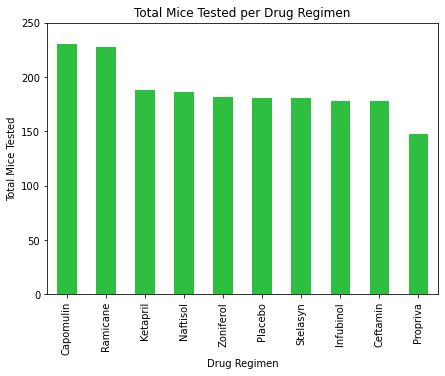

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# # Use DataFrame.plot() in order to create a bar chart of the data
value_ct.plot(kind="bar",figsize=(7,5), color = "#2EBF41", align = "center")

# # # Set a title for the chart
plt.title("Total Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice Tested")

# #Set x and y limits
plt.ylim(0, 250)

plt.show()

    


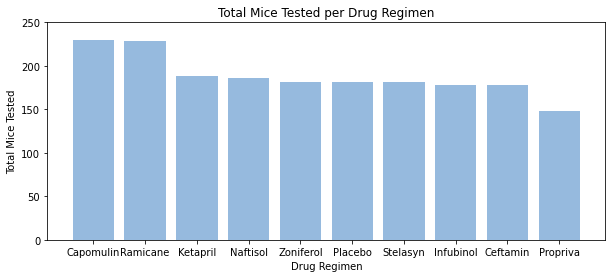

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Set x axis and tick locations
x_axis = value_ct.index
tick_locations = [value for value in x_axis]

# # Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,4))
plt.bar(x_axis, value_ct, color="#2E76BF", alpha=0.5, align="center")

# # Set x and y limits
plt.ylim(0, 250)

# # Set a Title and labels
plt.title("Total Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice Tested")

plt.show()


50.403225806451616
49.596774193548384


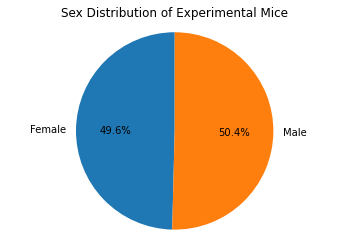

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Total mice calculated above is 248
#Find percent of each

#Don't want duplicate entries
timepoint_0 = combined_study_data_cln.loc[(combined_study_data_cln["Timepoint"]== 0)]
timepoint_0.head()

females_list = timepoint_0.loc[(timepoint_0["Sex"] == "Female")] 
females_list = len(females_list)

#print(f"This is {len(females_list)}")


males_list = timepoint_0.loc[(timepoint_0["Sex"] == "Male")]
males_list = len(males_list)

#Calculating Percents
percent_males = (males_list/248)*100
print(percent_males)

percent_females = (females_list/248)*100
print(percent_females)


#autopct= "%1.1f%%"
#matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, 
    #wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, data=None)[source]4
    
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
sexes = ["Female", "Male"]
sizes = [49.6, 50.4]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=sexes, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Sex Distribution of Experimental Mice")

plt.show()

<AxesSubplot:ylabel='Sex'>

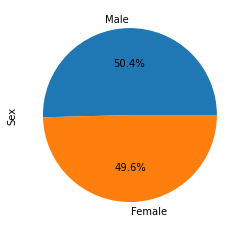

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

new = timepoint_0["Sex"].value_counts()

new.plot(kind='pie', autopct='%0.1f%%')


# Quartiles, Outliers, and Box Plots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

timepoints = combined_study_data_cln["Timepoint"].unique()
timepoints
#45 is final time point, but not all mice make it to the end
# timepoint_45 = combined_study_data_cln.loc[(combined_study_data_cln["Timepoint"]== 45)]
# timepoint_45.head()

values_timepoints = combined_study_data_cln["Timepoint"].value_counts()
print(values_timepoints)

# Start by getting the last (greatest) timepoint for each mouse

final_timepoint_df = combined_study_data_cln.groupby("Mouse ID").max()["Timepoint"]
final_timepoint_df.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoints_merge = pd.merge(combined_study_data_cln, final_timepoint_df, on = ["Mouse ID", "Timepoint"], how = "right")
final_timepoints_merge.head()



0     248
5     236
10    221
15    205
20    193
25    182
30    170
35    153
40    142
45    130
Name: Timepoint, dtype: int64


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = combined_study_data_cln["Drug Regimen"].unique()
print(treatment_list)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

#for loop?


    

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


In [27]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor = final_timepoints_merge.loc[final_timepoints_merge["Drug Regimen"]==treatment, "Tumor Volume (mm3)"]
    # add subset
    tumor_vol.append(final_tumor)
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    upper_bound = upperq + (1.5*iqr)
    lower_bound = lowerq - (1.5*iqr)
    outliers = final_tumor.loc[(final_tumor < lower_bound) | (final_tumor > upper_bound)]
    print(f"{treatment} : Values below {lower_bound} could be outliers.")
    print(f"{treatment} :Values above {upper_bound} could be outliers.")

Ramicane : Values below 17.912664470000003 could be outliers.
Ramicane :Values above 54.30681135 could be outliers.
Capomulin : Values below 20.70456164999999 could be outliers.
Capomulin :Values above 51.83201549 could be outliers.
Infubinol : Values below 36.83290494999999 could be outliers.
Infubinol :Values above 82.74144559000001 could be outliers.
Placebo : Values below 30.15582196999999 could be outliers.
Placebo :Values above 90.92136789000001 could be outliers.
Ceftamin : Values below 25.355449580000002 could be outliers.
Ceftamin :Values above 87.66645829999999 could be outliers.
Stelasyn : Values below 27.53557243999998 could be outliers.
Stelasyn :Values above 94.04496758000002 could be outliers.
Zoniferol : Values below 24.77952216500001 could be outliers.
Zoniferol :Values above 92.00293628499998 could be outliers.
Ketapril : Values below 36.99186244000001 could be outliers.
Ketapril :Values above 89.60048379999998 could be outliers.
Propriva : Values below 28.76529576625

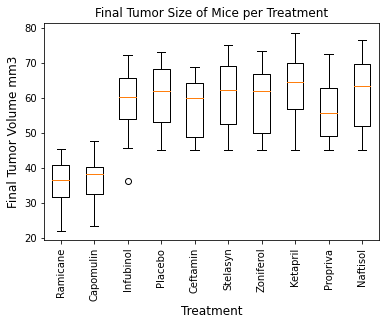

In [44]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

 
# box_plot_data=[value1,value2,value3,value4]
plt.boxplot(tumor_vol, labels = treatment_list)
plt.xticks(rotation=90)
plt.xlabel('Treatment', fontsize=12)
plt.ylabel('Final Tumor Volume mm3', fontsize=12)
plt.title("Final Tumor Size of Mice per Treatment")
plt.show()

# Line and Scatter Plots

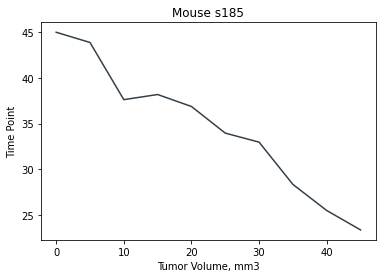

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Select a random mouse treated with Capomulin
capomulin_mice = combined_study_data_cln.loc[(combined_study_data_cln["Drug Regimen"] == "Capomulin")]
capomulin_mice

#Selecting the first one: Mouse ID s185

mouse_s185 = capomulin_mice.loc[(capomulin_mice["Mouse ID"] == "s185")]
mouse_s185

#Setting x and y
tumor_volume = mouse_s185["Tumor Volume (mm3)"]
time_point = mouse_s185["Timepoint"]


#Generating line plot

plt.plot(time_point, tumor_volume, color="#333f48" )

# # Set a Title and labels
plt.title("Mouse s185")
plt.xlabel("Tumor Volume, mm3")
plt.ylabel("Time Point")
#getting error here... investigate**************

# Show the chart
plt.show()

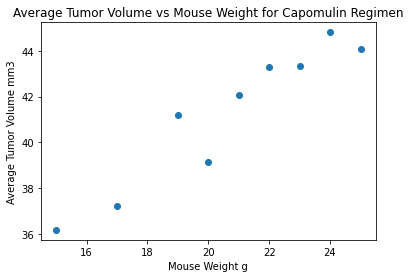

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Weight(g), Tumor Volume (mm3)

capomulin_mice_av = capomulin_mice.groupby("Weight (g)").mean()["Tumor Volume (mm3)"]
capomulin_mice_av

# Generate Plot
plt.scatter(capomulin_mice_av.index, capomulin_mice_av, linewidths = 1)
plt.xlabel('Mouse Weight g')
plt.ylabel('Average Tumor Volume mm3')
plt.title ('Average Tumor Volume vs Mouse Weight for Capomulin Regimen')
plt.show()

#average_capomulin_tumor_vol = capomulin_mice["Tumor Volume, (mm3)"]


# Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Using capomulin_mice_av

In [22]:
#Calculating correlation coefficient
cap_mouse_weight = capomulin_mice_av.index
cap_average_tumor_vol = capomulin_mice_av
                                    
# Calculate the correlation coefficient between  mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(cap_mouse_weight, cap_average_tumor_vol)[0],2)}")                  

#I got an answer different than that of the example... 0.95 instead of 0.84 hmmm, well my scatter plot looks different as well


The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.95


In [23]:
#Linear regression model

The r-squared is: 0.9034966277438602


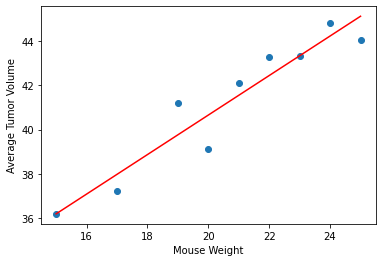

In [24]:
# Plot the different factors in a scatter plot
x_values = cap_mouse_weight
y_values = cap_average_tumor_vol

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
plt.show()